# Breast Cancer Prediction

**Oleh : Sardi Irfansyah**

Pada submission ini saya mencoba membuat model machine learning untuk memprediksi Breast Cancer apakah jinak (benign) atau ganas (malignant). Saya juga akan menerepkan beberapa teknik berkaitan dengan Feature Engineering dan beberapa algoritma machine learning, serta ingin membuktikan apakah benar bahwa feature scaling tidak berpengaruh terhadap algoritma yang non-linear.

# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 2. Data Loading

In [44]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


# 3. Data Understanding

**Informasi Tentang dfset:**

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)

Sepuluh fitur bernilai real dihitung untuk setiap cell nucleus:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

Rata-rata, standar error dan "worst" atau largest (mean dari ketiga
nilai terbesar) dari fitur ini dihitung untuk setiap imagenya,
menghasilkan 30 fitur. Misalnya, bidang 3 adalah Mean Radius, bidang
13 adalah Radius SE, bidang 23 adalah Worst Radius.

Semua nilai fitur dikodekan ulang dengan empat digit signifikan.

Distribusi kelas: 357 jinak, 212 ganas

In [46]:
# cek dimensi dfframe (baris dan kolom)
df.shape

(569, 33)

In [47]:
#cek missing values
print("Jumlah missing values :", df.isnull().sum().sum())

pd.DataFrame({
    'missing value':df.isnull().sum()
})

Jumlah missing values : 569


,missing value
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


ternyata ada kolom Unnamed: 32 yang tidak digunakan dan keseluruhannya missing sehingga kita dapat mendrop kolom tersebut dan juga kolom id.

In [48]:
df.drop(['Unnamed: 32','id'], axis = 1, inplace = True)

In [49]:
#cek type df tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [50]:
# ubah data diagnosis menjadi 1 dan 0
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [51]:
# Summary statistical descriptive
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 4. Exploratory df Analysis (EDA)

## 4.1 Jumlah Diagnosis & Persentase

Dibagian ini saya akan mengecek jumlah perbadingan diagnosis antara Malignant dan Benign menggunakan bar chart serta melihat persentasenya dengan pie chart

In [52]:
df.diagnosis.unique()

array([1, 0], dtype=int64)

In [53]:
# kolom diagnosis
M = df[(df['diagnosis'] != 0)] #jinak
B = df[(df['diagnosis'] == 0)] #ganas

In [54]:
#memubuat visualisasi Bar Chart dengan plotly
trace = go.Bar(x = (len(M), len(B)), y = ['Malignant', 'Benign'], 
               orientation = 'h', opacity = 0.8, 
               marker=dict(color=[ 'DeepPink', 'DodgerBlue'], line=dict(color='#000000',width=1.5)))

layout = dict(title = 'Jumlah Diagnosis (Benign Vs Malignant)')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#membuat visualisasi Pie Chart
trace = go.Pie(labels = ['Benign','Malignant'],
               values = df['diagnosis'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=[ 'DeepPink', 'DodgerBlue'], line=dict(color='#000000', width=1.5)))


layout = dict(title = 'Persentase Diagnosis')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)


## 4.2 Colerralation Matrix

In [55]:
#correlation
corr_data = df.corr()

#tick labels
matrix_cols = corr_data.columns.tolist()

#convert ke array
corr_array  = np.array(corr_data)

In [56]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix Setiap Fitur',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

dari correlation matrix tersebut dapat kita lihat bahwa ada beberapa fitur yang berkolerasi tinggi terhadap kolom diagnosis, disini saya akan mengambil fitur yang correlationnya lebih dari +0.7 atau kurang dari -0.7 yaitu:

1. radius_mean (0.73)
2. perimeter_mean (0.74)
3. area_mean (0.71)
4. concave points_mean (0.77)
5. radius_worst (0.78)
6. perimeter_worst (0.78)
7. area_worst (0.73)
8. concave points_worst (0.79)

Fitur-fitur diatas akan saya coba cek distribusinya.

## 4.3 Distribusi Dari Beberapa Fitur

In [57]:
#membuat fungsi untuk plot distribusi untuk beberapa fitur
def plot_dist(select_data, size_bin) :  
    set1 = M[select_data]
    set2 = B[select_data]
    hist_data = [set1, set2]
    
    group_labels = ['Malignant', 'Benign']
    colors = [ 'DeepPink', 'DodgerBlue']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = select_data)

    py.iplot(fig, filename = 'Density plot')

In [58]:
# memanggi fungsi plot
plot_dist('radius_mean', .5)
plot_dist('radius_worst', .5)

In [59]:
#plot untuk perimeter
plot_dist('perimeter_mean', 5)
plot_dist('perimeter_worst', 5)

In [60]:
#plot untuk area
plot_dist('area_mean', 10)
plot_dist('area_worst', 10)

In [61]:
#plot untuk concave points
plot_dist('concave points_mean', .05)
plot_dist('concave points_worst', .05)


# 5. Feature Engineering


Dibagian ini saya mencoba untuk melakukan proses feature engineering untuk mengolah fitur agar model yang saya buat dapat berjalan dengan baik dan menghasilkan model yang akurat.

## 5.1 Feature Selection

Sebelumnya kita sudah mencoba melakukan pengecekan correlation matrix untuk mengetahui correlation setiap variable dan mencari fitur mana yang berkolerasi tinggi, yang mana fitur-fitur yang berkolerasi tinggi tersebut dapat kita gunakan sebagai fitur yang akan kita gunakan untuk membuat model.

Selain dengan kolerasi kita juga dapat menggunakan seleksi fitur dengan menggunakan ExtraTreesClassifier.

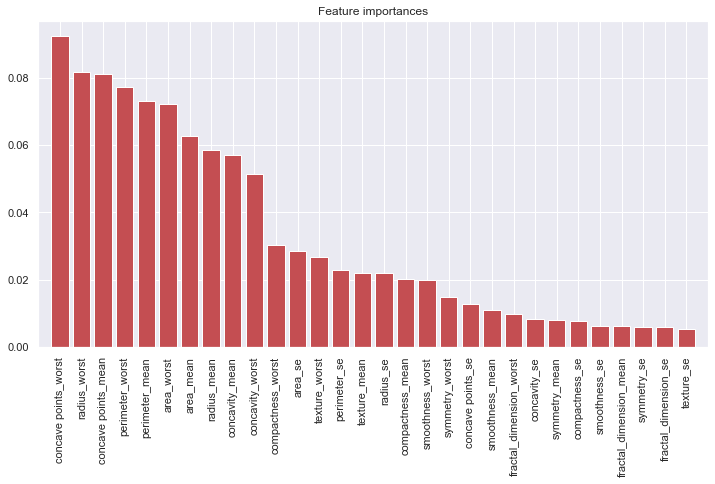

In [158]:
from sklearn.ensemble import ExtraTreesClassifier

#memisalkan antara fitur dan target
X= df.drop(['diagnosis'], axis = 1) #fitur
y = df['diagnosis'] #target

# feature extraction
model = ExtraTreesClassifier(n_estimators=400)
model.fit(X, y)

# feature_importances_ dari highest ke lowest
sorted_idx = np.argsort(model.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_[sorted_idx],
        color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Dari proses tersebut dapat kita liat bahwa ada beberapa fitur yang sangat penting yaitu:
1. concave points_worst
2. radius_worst
3. perimeter_worst
4. concave points_mean
5. perimeter_mean

kalau kita lihat dari list fitur tersebut juga terdapat pada list yang berkolerasi tinggi di correlation matrix, maka kita dapat menggunakan fitur-fitur tersebut untuk membuat model.

In [159]:
# select fitur yang paling penting
fitur = X.columns[sorted_idx][:5]
X = df[fitur]
X

,concave points_worst,radius_worst,concave points_mean,perimeter_worst,perimeter_mean
0,0.2654,25.380,0.14710,184.60,122.80
1,0.1860,24.990,0.07017,158.80,132.90
2,0.2430,23.570,0.12790,152.50,130.00
3,0.2575,14.910,0.10520,98.87,77.58
4,0.1625,22.540,0.10430,152.20,135.10
...,...,...,...,...,...
564,0.2216,25.450,0.13890,166.10,142.00
565,0.1628,23.690,0.09791,155.00,131.20
566,0.1418,18.980,0.05302,126.70,108.30
567,0.2650,25.740,0.15200,184.60,140.10


## 5.2 Split Data

In [224]:
# split data menadi training dan testing
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## 5.3 Build Pipeline untuk Preprocessing dan Modeling

https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86

In [328]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

#untuk model klasifikasi
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [303]:
#pipeline untuk normalisasi data dan pembuatan model
pipe_tree = Pipeline([
('scaler', StandardScaler()),
('classifier', DecisionTreeClassifier(random_state=0))])

pipe_xgb = Pipeline([
('scaler', StandardScaler()),
('classifier', XGBClassifier(random_state=0))])

pipe_log = Pipeline([
('scaler', StandardScaler()),
('classifier', LogisticRegression(random_state=0))])

In [321]:
#membuat parameters Tuning untuk model
parameters_tree = {'scaler': [StandardScaler(),MinMaxScaler()],
              'classifier__criterion':['gini','entropy'],
              'classifier__max_depth':np.arange(2,8),
              'classifier__min_samples_split':np.arange(2,8),
              'classifier__min_samples_leaf':np.arange(2,8),
              'classifier__max_features':['auto','sqrt','log2']
              }

parameters_xgb = {'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__learning_rate':[0.1,0.01,0.001],
             'classifier__n_estimators':np.arange(100,501,100),
             'classifier__max_depth':np.arange(2,8),
             }

parameters_log = {'scaler': [StandardScaler(), MinMaxScaler()],
                  'classifier__penalty': ['l1', 'l2','elasticnet', 'none'],
                  'classifier__C' : [0.001, 0.01, 0.1, 1],
                  'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                }


# 6. Modeling

Sebelumnya saya telah membuat pipeline yang berfungsi untuk normalisasi data dan modeling. Model yang saya gunakan adalah Decision Tree Classifier, XGBoost Classifier dan KNN Classifeir. Model tersebut akan di tuning dengan beberapa parameter menggunakan GridSearchCV untuk mencari best parameter dengan score terbaik yang dapat digunakan untuk membuat model.

## 6.1 Decision Tree Classifier

In [252]:
#pipeline for parameter tuning
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(pipe_tree, parameters_tree, cv=2).fit(X_train, y_train)

In [253]:
print('Training set score: ' + str(grid_tree.score(X_train, y_train)))
print('Test set score: ' + str(grid_tree.score(X_test, y_test)))

Training set score: 0.9538461538461539
Test set score: 0.9385964912280702


Model diatas agak sedikit overfitting

In [254]:
# Access the best set of parameters
best_params_tree = grid_tree.best_params_
print(best_params_tree)
# Simpan optimum model
best_pipe_tree = grid_tree.best_estimator_
print(best_pipe_tree)
 
result_df_tree = pd.DataFrame.from_dict(grid_tree.cv_results_, orient='columns')
print(result_df_tree.columns)


{'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=4, max_features='auto',
                                        min_samples_leaf=4, random_state=0))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__criterion', 'param_classifier__max_depth',
       'param_classifier__max_features', 'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


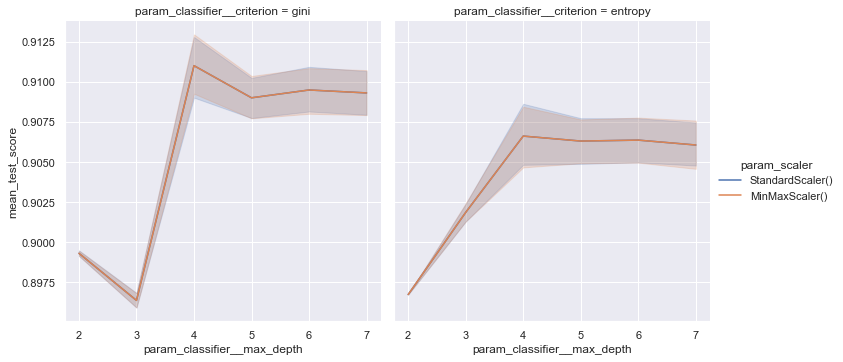

In [255]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_tree,
	kind='line',
	x='param_classifier__max_depth',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__criterion')
plt.show()

Dari gambar diatas dapat kita lihat bahwa penentuai *max_depth* dan *criterion* pada Decision Tree Classifier sangat mempengaruhi model yang dibuat, namun teknik normalisasi antara StandarScaler dan MinMaxScaler tidak begitu berpengaruh pada algoritma yang non-linear seperti Decision Tree. 

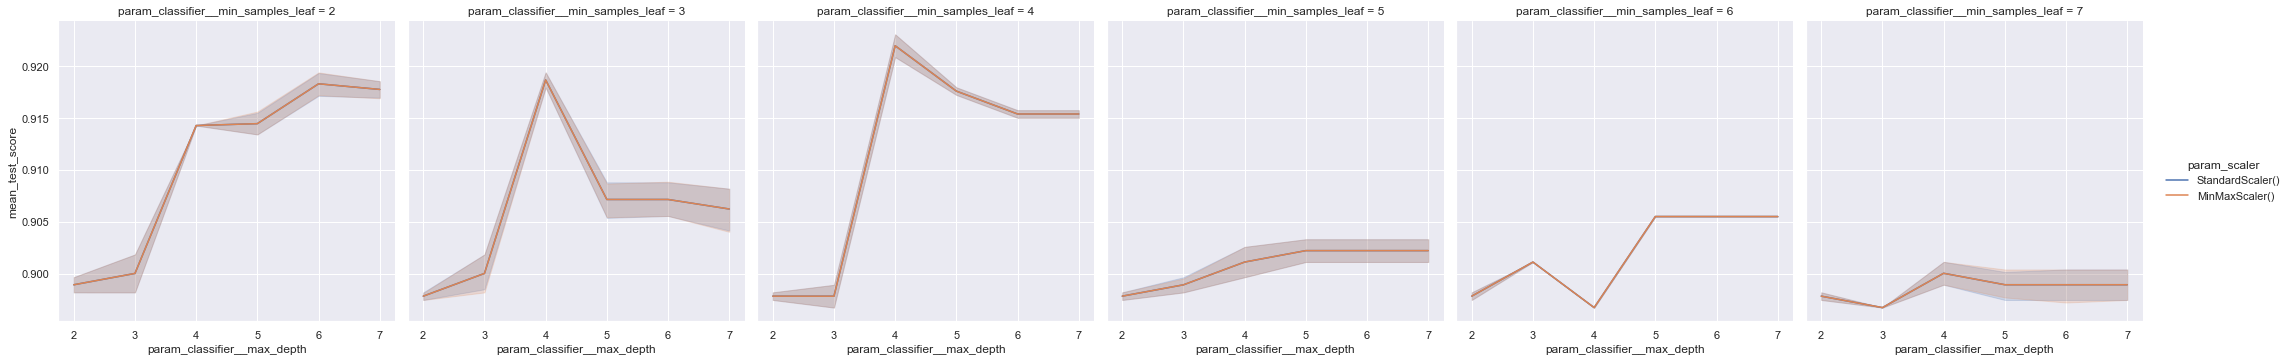

In [327]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_tree,
	kind='line',
	x='param_classifier__max_depth',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__min_samples_leaf')
plt.show()

Dari gambar diatas dapat kita lihat bahwa selain *max_depth*, nilai *min_samples_leaf* pada Decision Tree Classifier sangat mempengaruhi model.

In [329]:
# Cek confusion matrix
cf_matrix = confusion_matrix(y_test, best_pipe_tree.predict(X_test))
cf_matrix

array([[68,  4],
       [ 3, 39]], dtype=int64)

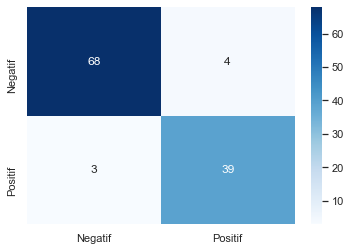

In [337]:
# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

terdapat 68+39 yang terprediksi benar dan 4+3 yang terprediksi salah.

In [338]:
print(classification_report(y_test, best_pipe_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## 6.2 XGBoost Classifier

In [ ]:
grid_xgb = GridSearchCV(pipe_xgb, parameters_xgb, cv=2).fit(X_train, y_train)

In [277]:
print('Training set score: ' + str(grid_xgb.score(X_train, y_train)))
print('Test set score: ' + str(grid_xgb.score(X_test, y_test)))

Training set score: 0.9934065934065934
Test set score: 0.956140350877193


Model tersebut agak sedikit overfitting

In [280]:
# Access the best set of parameters
best_params_xgb = grid_xgb.best_params_
print(best_params_xgb)

# simpan optimum model
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
 
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)


{'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__n_estimators': 200, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
              

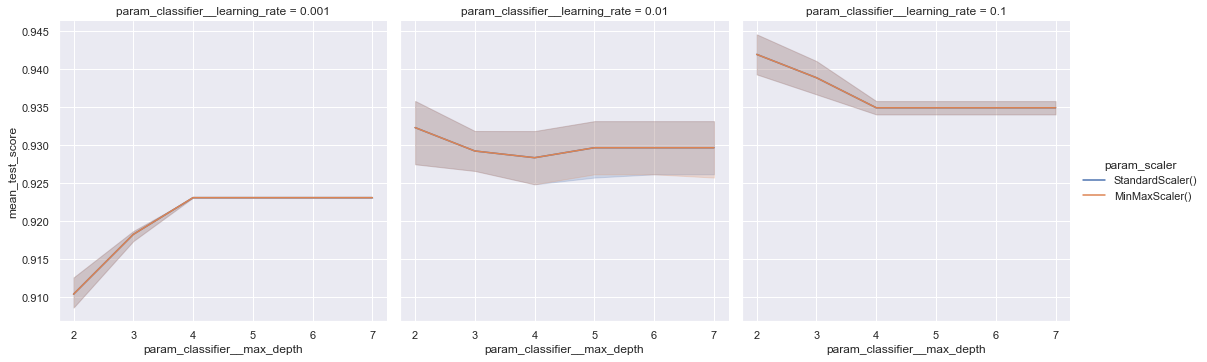

In [285]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_xgb,
	kind='line',
	x='param_classifier__max_depth',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__learning_rate')
plt.show()

Dari gambar diatas dapat kita lihat bahwa *max_depth* dan *learning_rate* pada XGBoost Classifier sangat berpengaruh.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
grid_xgb = GridSearchCV(pipe_xgb, parameters_xgb, cv=2).fit(X_train, y_train)

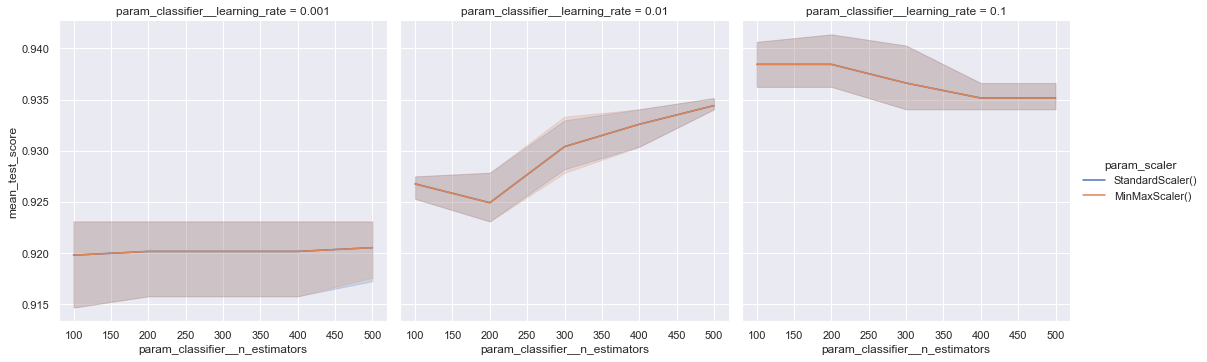

In [287]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_xgb,
	kind='line',
	x='param_classifier__n_estimators',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__learning_rate')
plt.show()

Dari gambar diatas dapat kita lihat bahwa *n_estimators* pada XGBoost Classifier sangat berpengaruh terhadap score model. Namun, penentuan scaler pada model boosting ini sangat tidak berpengaruh.

In [339]:
# Cek confusion matrix
cf_matrix_xgb = confusion_matrix(y_test, best_pipe_xgb.predict(X_test))
cf_matrix_xgb

array([[69,  3],
       [ 2, 40]], dtype=int64)

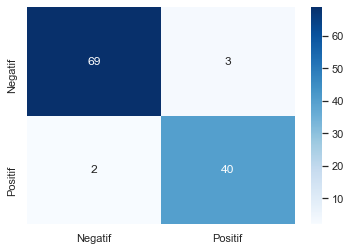

In [340]:
# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_xgb, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

terdapat 69+40 yang terprediksi benar dan 3+2 yang terprediksi salah.

In [342]:
print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## 6.3 Logistic Regression Classifier

In [323]:
grid_log = GridSearchCV(pipe_log, parameters_log, cv=2).fit(X_train, y_train)

In [324]:
print('Training set score: ' + str(grid_log.score(X_train, y_train)))
print('Test set score: ' + str(grid_log.score(X_test, y_test)))

Training set score: 0.9648351648351648
Test set score: 0.9298245614035088


In [325]:
# Access the best set of parameters
best_params_log = grid_log.best_params_
print(best_params_log)

# simpan optimum model
best_pipe_log = grid_log.best_estimator_
print(best_pipe_log)
 
result_df_log = pd.DataFrame.from_dict(grid_log.cv_results_, orient='columns')
print(result_df_log.columns)


{'classifier__C': 0.001, 'classifier__penalty': 'none', 'classifier__solver': 'saga', 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.001, penalty='none', random_state=0,
                                    solver='saga'))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__penalty',
       'param_classifier__solver', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


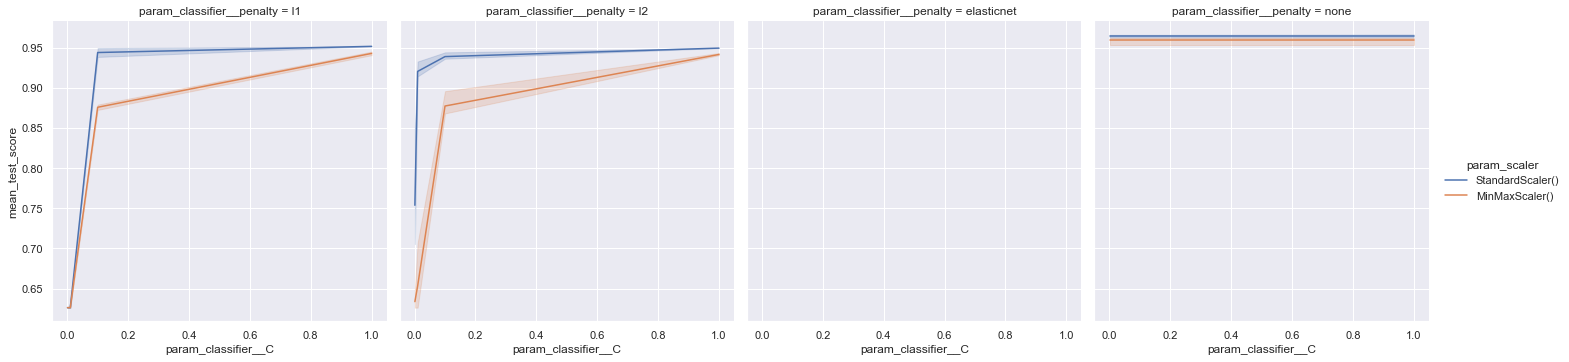

In [326]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_log,
	kind='line',
	x='param_classifier__C',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__penalty')
plt.show()

Dari gambar diatas dapat kita lihat bahwa penentuan teknik normalisasi pada Logisitic Regression akan mempengaruhi akurasi dari model yang kita buat, berbeda dengan kasus Decision Tree Classifier dan XGBoost Classifier yang memang teknik normalisasi tidak terlalu berpengaruh untuk algoritma tersebut.

Selain teknik normalisasi nilai C dan penalty juga akan berpengaruh terhadap akurasi pada model Logistic Regression.

In [343]:
# Cek confusion matrix
cf_matrix_log = confusion_matrix(y_test, best_pipe_log.predict(X_test))
cf_matrix_log

array([[67,  5],
       [ 3, 39]], dtype=int64)

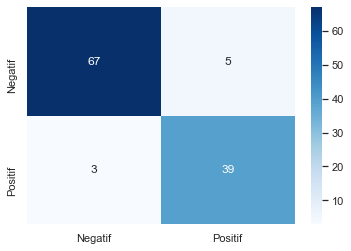

In [344]:
# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_log, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

terdapat 67+39 yang terprediksi benar dan 5+3 yang terprediksi salah.

In [345]:
print(classification_report(y_test, best_pipe_log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## 6.4 Perbandingan Model

In [359]:
log_reg = grid_log.score(X_test, y_test)
dt_clf = grid_tree.score(X_test, y_test)
xgb_clf = grid_xgb.score(X_test, y_test)

print(round(log_reg,2))
print(round(dt_clf,2))
print(round(xgb_clf,2))

0.93
0.94
0.96


<AxesSubplot:>

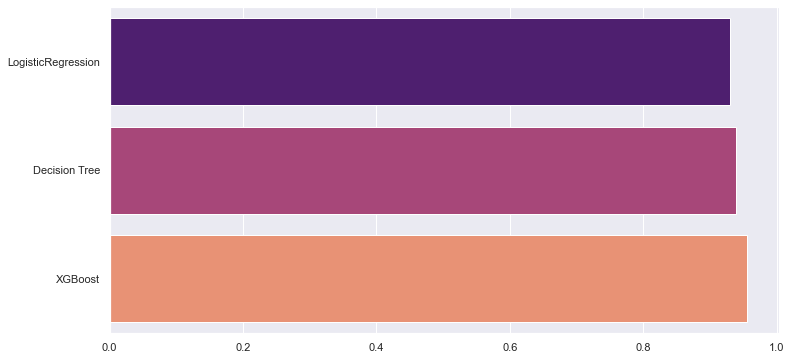

In [355]:
plt.figure(figsize=(12,6))
model_acc = [log_reg, dt_clf, xgb_clf]
model_name = ['LogisticRegression', 'Decision Tree', 'XGBoost']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [368]:
from sklearn.metrics import f1_score, recall_score

models = {
    'log_reg':best_pipe_log,
    'dt_clf':best_pipe_tree,
    'xgb_clf':best_pipe_xgb,
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score
}

df_model = pd.DataFrame(columns=models.keys(), index=['f1_score','recall'])

for metric in metrics.keys():
    for model in models.keys():
        df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [369]:
df_model

,log_reg,dt_clf,xgb_clf
f1_score,0.906977,0.917647,0.941176
recall,0.928571,0.928571,0.952381


# 7. Kesimpulan

Dari project yang saya buat terdapat beberapa fitur yang berkolerasi tinggi (+0.70 atau -0.70) yaitu:

1. radius_mean (0.73)
2. perimeter_mean (0.74)
3. area_mean (0.71)
4. concave points_mean (0.77)
5. radius_worst (0.78)
6. perimeter_worst (0.78)
7. area_worst (0.73)
8. concave points_worst (0.79)

sedangkan untuk features importances menggunakan ExtraTreesClassifier didapatkan:

1. concave points_worst
2. radius_worst
3. perimeter_worst
4. concave points_mean
5. perimeter_mean

Dari fitur tersebut kemudian saya membuat beberapa model dan melakukan GridSearchCV dengan beberapa parameter:
1. Decision Tree Classifier
    - Best Parameters = (max_depth=4, max_features='auto', min_samples_leaf=4 dan yang lainnya default)
    - Accuracy = Training set score: 0.95 dan Test set score: 0.94
2. XGBoost Classifier
    - Best Parameters = (learning_rate= 0.1, max_depth= 2, n_estimators': 200, dan yang lainnya default)
    - Accuracy = Training set score: 0.99 dan Test set score: 0.96
3. Logistic Regression Classifier
    - Best Parameters = (C=0.001, penalty='none', random_state=0, solver='saga', sedangkan yang lainnya default)
    - Accuracy = Training set score: 0.965 dan Test set score: 0.93

Dari model yang dibuat pemilihan teknik feature scaling atau normalisasi pada model hanya berpengengaruh untuk model yang linear seperti Logistic Regression, sedangkan untuk model non-linear seperti Decision Tree Classifier dan XGBoost Classifier tidak berpengaruh.

Model yang terbaik adalah XGBoost Classifier dengan accuracy, F1-Score, Recall, Precision yang lebih tinggi

# Referensi

1.  [Mehreen Saeed (June 14, 2021). Modeling Pipeline Optimization With scikit-learn. MachineLearningMastery.](https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/)
2. [Scikit-learn](https://scikit-learn.org/). *Documentation*
2.  [Josn Brownlee PhD (August 31, 2016). Feature Importance and Feature Selection With XGBoost in Python. MachineLearningMastery.](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/)
3. [Jason Brownlee PhD (May 20, 2016). Feature Selection For Machine Learning in Python. MachineLearningMastery.](https://machinelearningmastery.com/feature-selection-for-machine-learning-in-python/)
4. [Jason Brownlee PhD (September 26, 2014). Discover Feature Engineering, How to Engineer Features and How to Get Good at It. MachineLearningMastery.](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)
5. [Jason Brownlee PhD (November 27, 2019).How to Choose a Feature Selection Method For Machine Learning.  MachineLearningMastery.](https://machinelearningmastery.com/how-to-choose-a-feature-selection-method-for-machine-learning/)
6. [Which machine learning algorithms require feature scaling? (intellipaat.com)](https://intellipaat.com/community/49696/which-machine-learning-algorithms-require-feature-scaling)